# 📅 Week 4: Forecasting with Prophet

## Step 1: Load Data

In [1]:
import pandas as pd

#Skip first 2 rows to remove junk headers like "Price" and "Ticker"
data = pd.read_csv('../data/raw/AAPL_stock.csv', skiprows=2)

#Rename proper date and value columns
data.rename(columns={data.columns[0]: 'ds', data.columns[1]: 'y'}, inplace=True)

#Convert 'ds' to datetime
data['ds'] = pd.to_datetime(data['ds'])

data = data[['ds', 'y']]
data.tail()


,ds,y
2258,2023-12-22,192.192566
2259,2023-12-26,191.646545
2260,2023-12-27,191.745834
2261,2023-12-28,192.172699
2262,2023-12-29,191.130310


## Step 2: Install and Import Prophet

In [2]:

from prophet import Prophet

## Step 3: Fit Prophet Model

In [3]:
# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(data)

23:19:03 - cmdstanpy - INFO - Chain [1] start processing
23:19:03 - cmdstanpy - INFO - Chain [1] done processing


## Step 4: Forecast Next 30 Days

In [4]:
# Create future dataframe
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2288,2024-01-24,176.500535,165.782522,187.196024
2289,2024-01-25,176.655098,166.259978,186.852577
2290,2024-01-26,176.829724,166.508197,188.246257
2291,2024-01-27,176.487446,166.723284,186.725886
2292,2024-01-28,176.745451,166.829902,188.186266


## Step 5: Plot the Forecast

## Step 6: Evaluate Forecast Accuracy (RMSE)

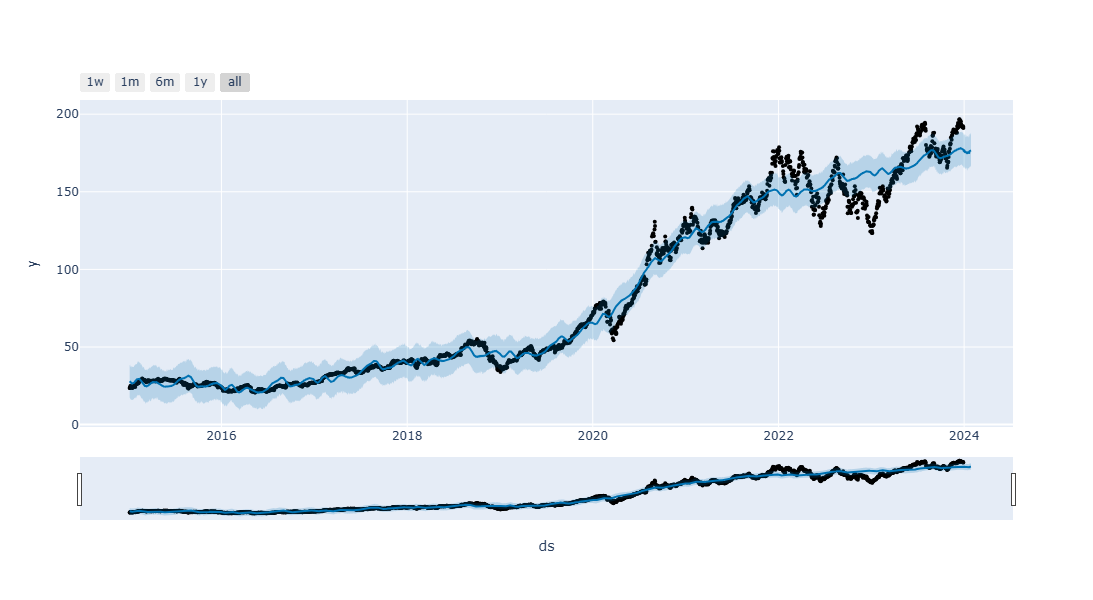

In [5]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast)

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get actual vs predicted for last 30 days
actual = data['y'][-30:].reset_index(drop=True)
predicted = forecast['yhat'][-30:].reset_index(drop=True)

rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)

RMSE: 16.01744712598191


## ✅ Summary

- Used Facebook Prophet for forecasting AAPL stock prices.
- Data formatted into 'ds' (date) and 'y' (closing price).
- Forecasted the next 30 days.
- Visualized the forecast with upper/lower confidence bands.
- RMSE (Root Mean Squared Error): **16.02**

Prophet handled seasonality and trends smoothly. 
